Problem Statement 21: 

Create stored functions for the following:


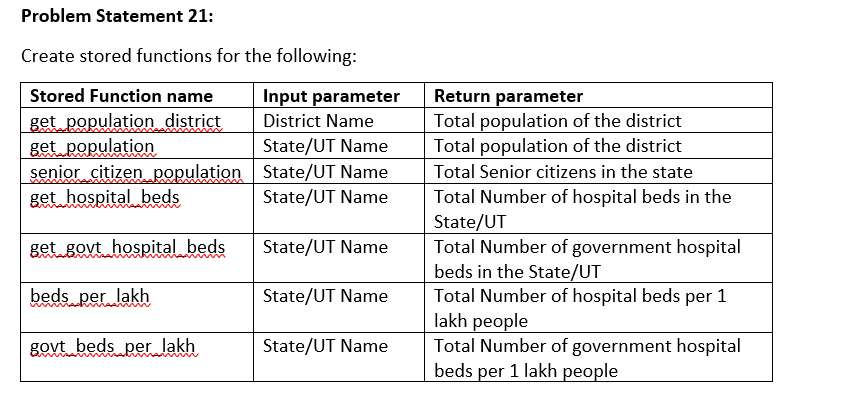

In [1]:

import pymysql
import pandas as pd
conn=pymysql.connect(
    host='localhost',
    user='root',
    password='Admin@123',
    db='python_project1')

In [2]:
cursor=conn.cursor()

In [39]:
query='CREATE FUNCTION Get_population_district(district_name VARCHAR(255))RETURNS INT BEGIN DECLARE total_population INT ;SELECT sum(population) INTO total_population FROM census WHERE district = district_name group by district;RETURN total_population;END;'

In [40]:
cursor.execute(query)

0

In [3]:
query3='select Get_population_district("Guntur");'


In [42]:
#SET GLOBAL log_bin_trust_function_creators = 1; in sql

In [4]:
df3=pd.read_sql_query(query3,conn)
print(df3)

   Get_population_district("Guntur")
0                            4887813


C:\Users\miles.MILE-BL-4748-LA.000\AppData\Local\Temp\ipykernel_1304\453965690.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3=pd.read_sql_query(query3,conn)


In [ ]:
#get_population state

In [46]:
query2='CREATE FUNCTION get_population(state VARCHAR(255)) RETURNS INT BEGIN DECLARE total_population INT ;SELECT SUM(population) INTO total_population FROM census WHERE stateorUT = state group by stateorUT; RETURN total_population;END;'

In [47]:
cursor.execute(query2)

0

In [5]:
query4='select Get_population("Andhra Pradesh");'


In [6]:
df3=pd.read_sql_query(query4,conn)
print(df3)

   Get_population("Andhra Pradesh")
0                          49386799


C:\Users\miles.MILE-BL-4748-LA.000\AppData\Local\Temp\ipykernel_1304\3946430618.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df3=pd.read_sql_query(query4,conn)


In [51]:
#senior_citizen_population

In [52]:
query_s='CREATE FUNCTION senior_citizen_population(state VARCHAR(255)) RETURNS INT BEGIN DECLARE total_senior_citizen INT ;SELECT sum(senior_citizen) INTO total_senior_citizen FROM census WHERE stateorUT = state group by stateorUT ;RETURN total_senior_citizen;END'

In [53]:
cursor.execute(query_s)

0

In [54]:
query='select senior_citizen_population("Karnataka");'
df_s=pd.read_sql_query(query, conn)
print(df_s)

   senior_citizen_population("Karnataka")
0                                10632806


C:\Users\miles.MILE-BL-4748-LA.000\AppData\Local\Temp\ipykernel_11508\470902595.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_s=pd.read_sql_query(query, conn)


In [55]:
#get_hospital_beds

In [57]:
query='CREATE FUNCTION get_hospital_beds(state VARCHAR(255))RETURNS INT BEGIN  DECLARE total_hospital_beds INT ; SELECT HospitalBeds INTO total_hospital_beds FROM hospitals WHERE StateorUT = state ; RETURN total_hospital_beds; END'


In [58]:
cursor.execute(query)

0

In [59]:
queryn='select get_hospital_beds("Karnataka");'
df_n=pd.read_sql_query(queryn, conn)
print(df_n)

   get_hospital_beds("Karnataka")
0                           56333


C:\Users\miles.MILE-BL-4748-LA.000\AppData\Local\Temp\ipykernel_11508\811258325.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_n=pd.read_sql_query(queryn, conn)


In [60]:
#get government hospital beds

In [61]:
query_govt='CREATE FUNCTION get_govt_hospital_beds(state VARCHAR(255))RETURNS INT BEGIN  DECLARE total_govt_hospital_beds INT ; SELECT (Rural_government_beds+urban_government_beds) INTO total_govt_hospital_beds FROM government_hospitals WHERE stateorut = state ; RETURN total_govt_hospital_beds;END'

In [62]:
cursor.execute(query_govt)

0

In [64]:
queryn='select get_govt_hospital_beds("Karnataka");'
df_n2=pd.read_sql_query(queryn, conn)
print(df_n2)

   get_govt_hospital_beds("Karnataka")
0                                70165


C:\Users\miles.MILE-BL-4748-LA.000\AppData\Local\Temp\ipykernel_11508\1870548225.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_n2=pd.read_sql_query(queryn, conn)


In [ ]:
#beds per lakh

In [72]:
query_b='create function beds_per_lakh(state varchar(255)) returns int begin declare total_beds_per_lakh int; with ct1 as  (SELECT c.stateorut, sum(c.Population) as Population from census c group by  c.stateorut )select (a.HospitalBeds/ct1.Population)*100000 into total_beds_per_lakh from ct1 join hospitals a on ct1.stateorut = a.stateorut where ct1.stateorut = state ;return total_beds_per_lakh;END'; 

In [73]:
cursor.execute(query_b)

0

In [74]:
queryb='select beds_per_lakh("Karnataka");'
df_b=pd.read_sql_query(queryb, conn)
print(df_b)

   beds_per_lakh("Karnataka")
0                          92


C:\Users\miles.MILE-BL-4748-LA.000\AppData\Local\Temp\ipykernel_11508\927554534.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_b=pd.read_sql_query(queryb, conn)


In [75]:
#7. GOVERNMENT BEDS PER 1 LAKH PEOPLE

In [76]:
query7='CREATE FUNCTION govt_beds_per_lakh(state varchar(50)) RETURNS INT begin DECLARE total_govt_beds_per_lakh int; select round((gh.bedsum/h.Population)*100000) INTO total_govt_beds_per_lakh  from hospitals h join government_hospitals gh on gh.StateorUT=h.StateorUT where gh.StateorUT=state;  return total_govt_beds_per_lakh;END'

In [77]:
cursor.execute(query7)

0

In [79]:
queryg='select govt_beds_per_lakh("Karnataka");'
df_g=pd.read_sql_query(queryg, conn)
print(df_g)

   govt_beds_per_lakh("Karnataka")
0                              115


C:\Users\miles.MILE-BL-4748-LA.000\AppData\Local\Temp\ipykernel_11508\833566689.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_g=pd.read_sql_query(queryg, conn)


It was reported* that in the north-eastern states, senior citizens are facing some issues in getting beds in a government hospital. Amir, from the department of healthcare, has requested a report on the healthcare situation in the north-eastern states.

The north-eastern states are listed in (Data/north_east_states.txt). Read the file and extract the state names using python and write a query to find the following information about those states from the database. Use the stored functions created earlier wherever relevant.
	State Name
	Population
	Senior Citizen Population
	Number of Government Hospital
	Number of Government Hospital Beds
	Number of Government Hospital beds for 1 Lakh population 
(Round the number to the nearest integer)
	Number of Government Hospital beds for 1 Lakh senior citizen
(Round the number to the nearest integer)

The rows should be sorted by the number of Government Hospital beds for 1 Lakh senior citizens in ascending order.


In [138]:
df=pd.read_csv('Data/NorthEast.txt',header=None)
df.columns=['State']

In [141]:
list1=df['State'].to_list()
list1

['Arunachal Pradesh',
 'Mizoram',
 'Manipur',
 'Tripura',
 'Assam',
 'Meghalaya',
 'Nagaland',
 'Sikkim']

In [142]:
tup =(list1,)

In [143]:
df

,State
0,Arunachal Pradesh
1,Mizoram
2,Manipur
3,Tripura
4,Assam
5,Meghalaya
6,Nagaland
7,Sikkim


In [149]:
with conn.cursor() as cursor:
    cursor.execute("""
        CREATE TABLE IF NOT EXISTS northeaststates(state varchar(50))""")
    conn.commit()

In [150]:
with conn.cursor() as cursor:
    # generate a parameterized SQL insert statement
    placeholders = ', '.join(['%s'] * len(df.columns))
    sql = f"INSERT INTO northeaststates VALUES ({placeholders})"

    # execute the insert statement with the data
    data = [tuple(row) for row in df.values]
    cursor.executemany(sql, data)
    conn.commit()

In [178]:
queryf="""SELECT distinct state, get_population(state) as population, 
senior_citizen_population(state) as senior_citizen_population, 
get_govt_hospital_beds(state) as Number_of_Government_Hospital_Beds,
beds_per_lakh(state) as Number_of_Hospital_Beds, 
govt_beds_per_lakh(state) as Number_of_government_Hospital_Beds ,
(govt_beds_per_lakh(state)/senior_citizen_population(state))*get_population(state) as Number_of_Govt_Hospital_beds_per_Lakh_senior_citizen
FROM northeaststates order by Number_of_Govt_Hospital_beds_per_Lakh_senior_citizen;"""

In [179]:
cursor=conn.cursor()
cursor.execute(queryf)

8

In [180]:
select=cursor.fetchall()

In [181]:
df=pd.DataFrame(select,columns=['State','Population','Senior citizen','Government_Hospitals_Beds','Number_of_Hospital_Beds','Number_of_government_Hospital_Beds','hospital_beds_for_1lakh_senior_citizen'])

In [182]:
df

,State,Population,Senior citizen,Government_Hospitals_Beds,Number_of_Hospital_Beds,Number_of_government_Hospital_Beds,hospital_beds_for_1lakh_senior_citizen
0,Manipur,2855794,409796,1427,90,50,348.4383
1,Assam,31205576,4127732,17142,61,55,415.7831
2,Tripura,3673917,568604,4417,133,120,775.3545
3,Nagaland,1978502,211983,1880,98,95,886.6637
4,Mizoram,1097206,144061,1997,211,182,1386.1585
5,Meghalaya,2966889,287754,4457,155,150,1546.5740
6,Arunachal Pradesh,1383727,139635,2404,168,174,1724.2691
7,Sikkim,610577,82725,1560,188,255,1882.1048
